In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dont-overfit-ii/sample_submission.csv
/kaggle/input/dont-overfit-ii/train.csv
/kaggle/input/dont-overfit-ii/test.csv


In [16]:
! ls ../input/dont-overfit-ii

sample_submission.csv  test.csv  train.csv


In [17]:
train = pd.read_csv("../input/dont-overfit-ii/train.csv")
test = pd.read_csv("../input/dont-overfit-ii/test.csv")

In [18]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


## EDA
* Right off the bat, we are looking at only 250 entries, with this little data of course we'll overfit.
* Overfitting is the result of on overcomplicated model; hence, we'll deploy some sort of feature selection to simplify the model complexity and combat overfitting in this manner. Also, we'll try to perform data augmentation if possible to get a bit more samples. More data will help with overfitting.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [21]:
train.isnull().sum() # doent seem to have any missing values

id        0
target    0
0         0
1         0
2         0
         ..
295       0
296       0
297       0
298       0
299       0
Length: 302, dtype: int64

In [22]:
train.isnull().any().any() # no missing values.

False

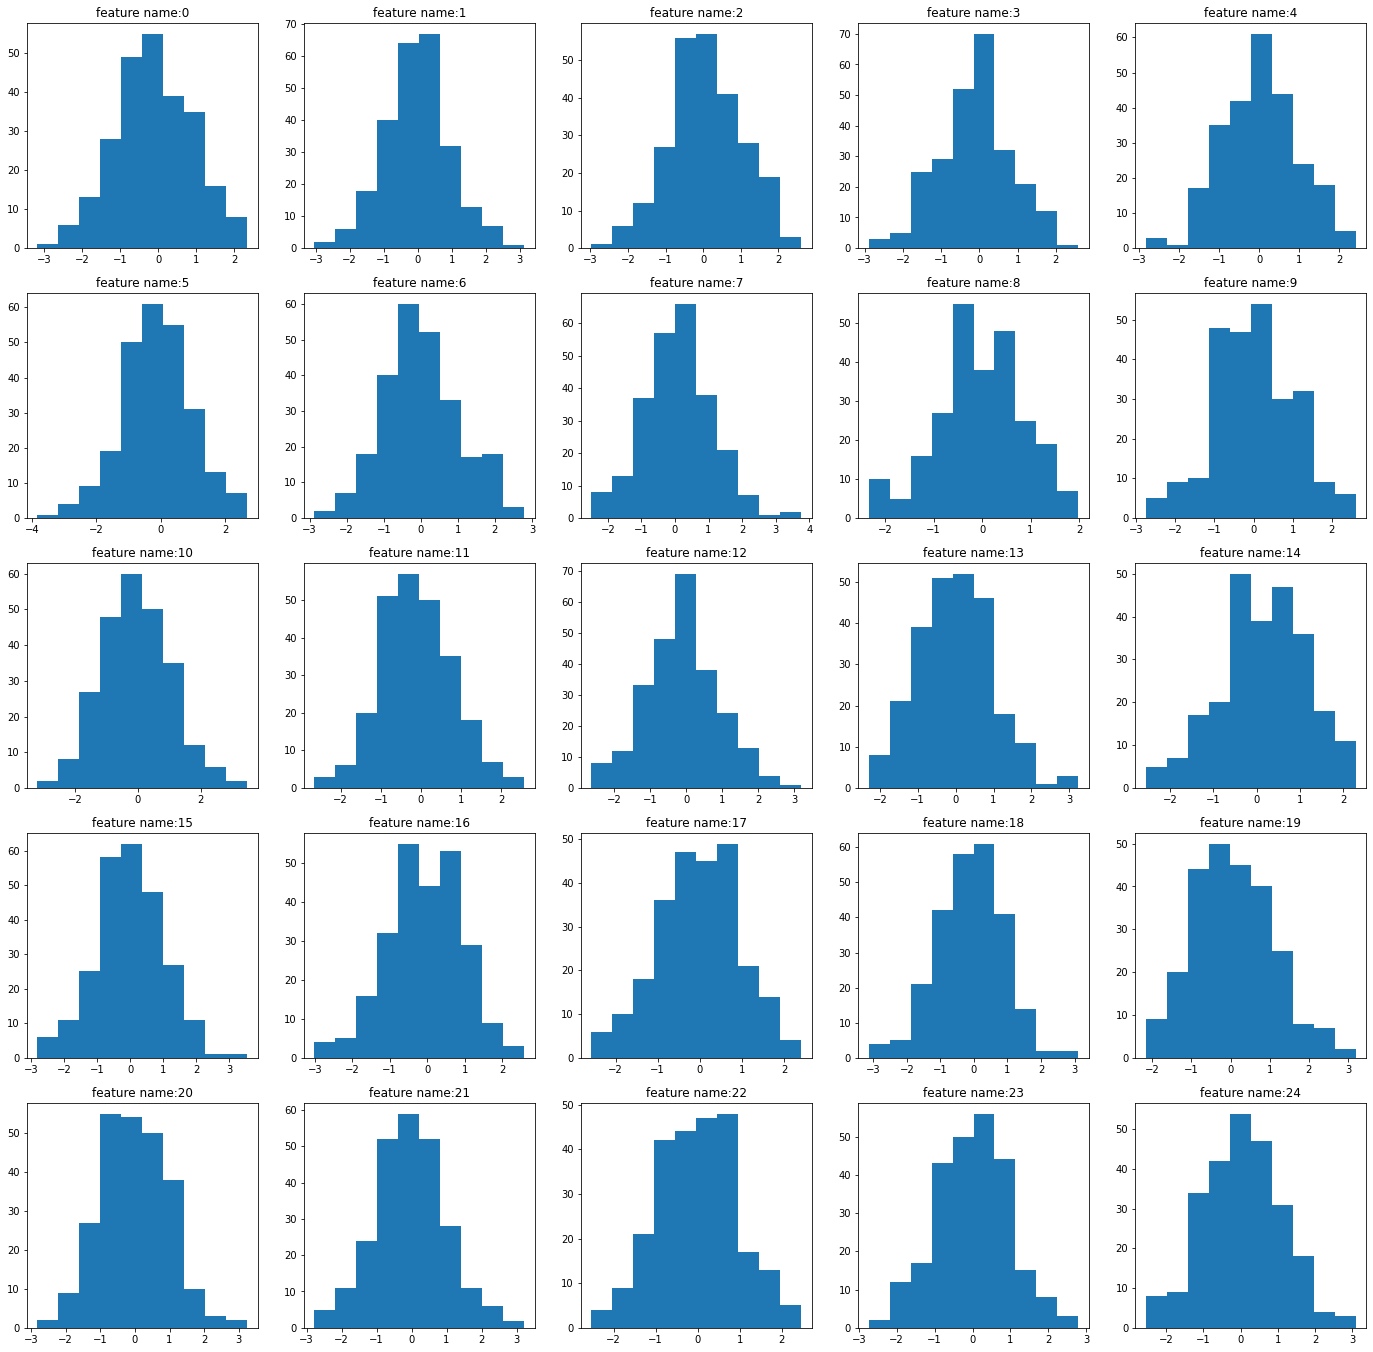

In [31]:
plt.figure(figsize=(24, 24))

for i, feature in enumerate(list(train.columns)[2:27]):
    plt.subplot(5, 5, i + 1)
    plt.hist(train[feature])
    plt.title(f'feature name:{feature}')

From above plots, looks like it's safe to assume all 302 cols/features are normally distributed.

In [36]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='target',data=train, palette='RdBu_r')

ValueError: count is not a valid plot kind

## Data Imbalance
From the Histogram above, we have data imbalance. Apply SMOTE?